# Exercise 8 Matplotlib: Air quality data visualization

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aselshall/eds/HEAD)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats

## 1. Problem statement

Analyize Miami's air quality data pre and post COVID-19 lockdown orders using EPA daily data for PM2.5, PM10, NO2, SO2, CO, and O3 from 01-04-2019 to 31-03-2021. For the six air quality parameters create: 
- line plots of the concnetrations in 6x1 subplot grid
- box plots of the concnetrations in 2x3 subplot grid
- box plots of the AQI values in 1x1 subplot grid (*optional*)

The figures should include proper labels and annotation. To complete this exercise, you will apply the skills learned in the Data Science Workflow, NumPy, and Matplotlib lessons.





## 2. Prepare data 

### 2.1 Load NumpPy arrays of dates, values, and aqi

Let us lour our pre-proceeded data 
1. `pre_dates` one year datetime data before lockdown
2. `pre_values` one year concentration data before lockdown for PM2.5, PM10, NO2, SO2,  CO, O3
3. `pre_aqi` one year aqi data before lockdown for PM2.5, PM10, NO2, SO2,  CO, O3
4. `post_dates` one year datetime data after lockdown
5. `post_values` one year concentration data after lockdown for PM2.5, PM10, NO2, SO2,  CO, O3
6. `post_aqi` one year aqi data after lockdown for PM2.5, PM10, NO2, SO2,  CO, O3

We do not need to use `allow_pickle=True` argument because these arrays do not have data with mixed types.

In [22]:
# Load the array from file
# Columns: [datetime, 'PM2.5', 'PM10',  'NO2', 'SO2',  'CO', 'O3']
pre_dates = np.load('data/pre_dates.npy')
pre_values = np.load('data/pre_values.npy')
pre_aqi = np.load('data/pre_aqi.npy')
post_dates = np.load('data/post_dates.npy')
post_values = np.load('data/post_values.npy')
post_aqi = np.load('data/post_aqi.npy')

#Display loaded data
print("pre_dates:", pre_dates.dtype, pre_dates.shape)
print(pre_dates[0],pre_dates[-1])
print("pre_values:", pre_values.dtype, pre_values.shape)
print("pre_aqi:", pre_aqi.dtype, pre_aqi.shape)
print("post_dates:", post_dates.dtype, pre_dates.shape)
print(pre_dates[0],post_dates[-1])
print("post_values:", post_values.dtype, pre_values.shape)
print("post_aqi:", post_aqi.dtype, pre_aqi.shape)

pre_dates: datetime64[us] (358,)
2019-04-01T00:00:00.000000 2020-03-31T00:00:00.000000
pre_values: float64 (358, 6)
pre_aqi: float64 (358, 6)
post_dates: datetime64[us] (358,)
2019-04-01T00:00:00.000000 2021-03-31T00:00:00.000000
post_values: float64 (358, 6)
post_aqi: float64 (358, 6)


### 2.2 Additional information

Here is additional information that can be helpful to our analysis. We can refer to EPA document [EPA 454/B-18-007](https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf) for concentration breakpoints indicating unhealthy levels for sensitive groups.

In [9]:
# Define date ranges
lockdown_start = pd.Timestamp('2020-04-01')
one_year_before = pd.Timestamp('2019-04-01')
one_year_after = pd.Timestamp('2021-04-01')

# Air quality parameter information
parameters = [        'PM2.5', 'PM10',  'NO2', 'SO2',  'CO', 'O3']
units = [             'µg/m³', 'µg/m³', 'ppb', 'ppb', 'ppm', 'ppm']
limits = [        35 ,      155,    100,   50,     9,  0.07]  # Unhealthy levels of senitive groups

## 3. Lineplot of concentration data

In a 6x1 grid of subplots:
1. plot pre and post data for the six parameter (Hint: use for loop)
2. remove horizontal spacing between subplots using `fig.subplots_adjust()` with `hspace` keyword
3. set x-axis limits from '2019-01-01' to '2021-01-01' using `ax.set_xlim()` with the aid of `pd.to_datetime('2019-04-01')` to convert string to datetime
4. Add horizontal line with label if concentration exceeds the healthy limit
5. Add propor labels and annotations

Here is the code:

PM2.5 exceeds healthy limit


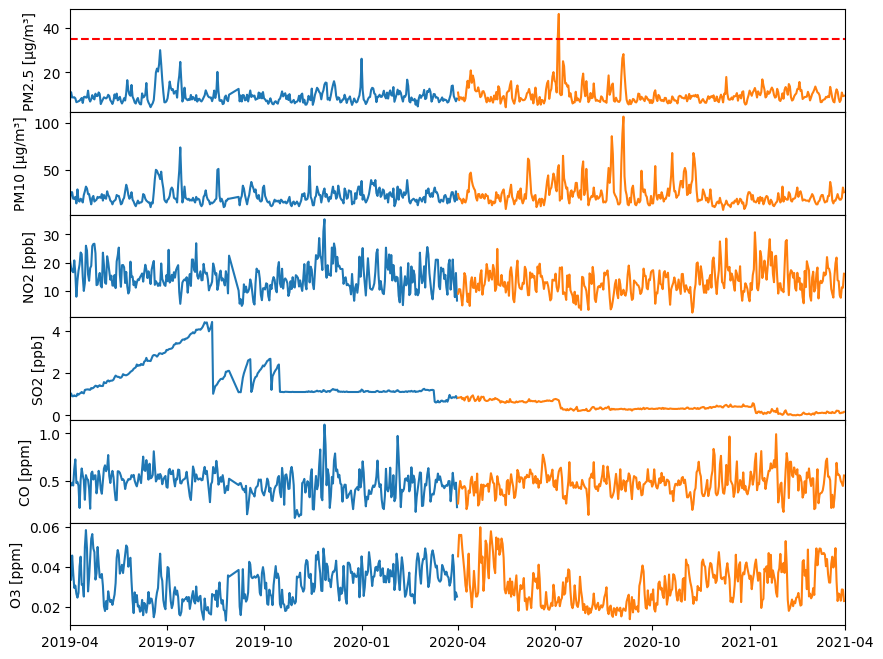

In [11]:
#Create Figure and Axes objects (6x1) 
# with figure size 10 inche long by 8 wide inches and shared x-axis
fig, ax = plt.subplots(6, 1, figsize=(10, 8), sharex=True)

#Change horizontal spaces between subplot
fig.subplots_adjust(hspace=0)
    
for index, (parameter, unit, limit) in enumerate(zip(parameters,units,limits)):
    
    # Plot times as x-variable and air qualiy parameter as y-variable
    ax[index].plot(pre_dates, pre_values[:,index])   #pre
    ax[index].plot(post_dates, post_values[:,index])   #post

    # Add a horizontal line for healthy limit
    if (limit<= max(pre_values[:, index])) or (limit<= max(post_values[:, index])):
        print(f"{parameter} exceeds healthy limit")
        ax[index].axhline(y=limit, color='r', linestyle='--', label='Healthy Limit')
    
    # Set the x-axis limits using the datetime objects
    # Note we need to convert date strings to datetime objects because our NumPy area has datetime
    ax[index].set_xlim(pd.to_datetime('2019-04-01') , pd.to_datetime('2021-04-01'))
    
    # Set y-label
    ax[index].set_ylabel(f"{parameter} [{unit}]");

## 4. Boxplots of concentration data and aqi values

A boxplot is a useful visualization for understanding the spread and central tendency of a dataset.

### 4.1 Background

A boxplot is a graphical representation of the distribution of a dataset that shows the median, quartiles, and potential outliers. It is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum where
- Median (Q2): The middle value of the dataset when it is ordered in ascending order. It divides the data into two equal halves.
- Quartiles (Q1 and Q3): Q1 is the value below which 25% of the data falls, and Q3 is the value below which 75% of the data falls.
- Interquartile Range (IQR): The range between the first and third quartiles (IQR = Q3 - Q1). It represents the middle 50% of the data.
- Whiskers: Lines extending from the box that show the range of the data. Typically, they extend 1.5 times the IQR from the edges of the box.
- Outliers: Individual data points that fall outside the whiskers.

When `notch=True` is set in a boxplot, the notches are added to the middle of the boxes. The notches represent a confidence interval around the median. If the notches of two boxes do not overlap, it suggests that the medians are significantly different at a certain confidence level.

### 4.2 Boxplot of concentration data

In a 2x3 subplot grid: 
- prepare boxplot for each parameter pre and post lockdown in a subplot
- Add horizontal line with label if concentration exceeds the healthy limit
- Add propor labels and annotations

Here is the code:

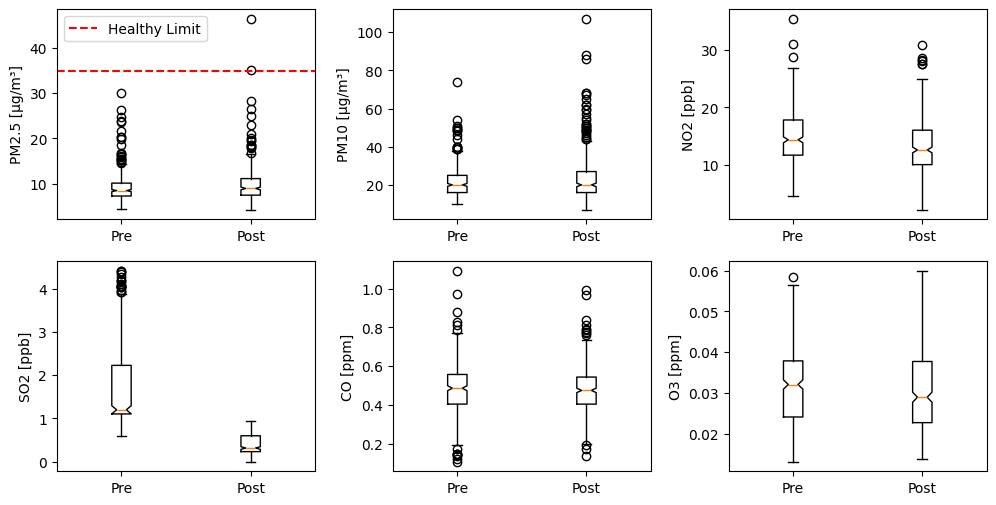

In [20]:
# Create a figure object and Axes object using subplots() method
n = 2 #Number of rows
m = 3 #Number of colums
fig, axes = plt.subplots(n, m, figsize=(12, 6))  # Increase the figure size for more space

# Increase the horizontal space (wspace)and vertical (hspace) space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.2)  

#Loop for each parameter
for index, (parameter,unit,limit) in enumerate(zip(parameters,units,limits)):

    # Select axex
    ax = axes[index // m, index % m]
    
    # Plot data 
    ax.boxplot([pre_values[:, index], post_values[:, index] ], notch=True)

    # Set xtick Label
    ax.set_xticklabels(["Pre","Post"])

    # Set y label
    ax.set_ylabel(f"{parameter} [{unit}]")

    #Add a horizontal line at the healthy limit if exceeded
    ## Maximum concentration value in the dataset
    max_value = np.concatenate((pre_values[:, index], post_values[:, index])).max()

    
    ## Add a horizontal dashed red line at the healthy limit value
    if max_value >= limit:
        ax.axhline(y=limit, color='r', linestyle='--', label='Healthy Limit')

        ### Add legend
        ax.legend()

### 4.3 Boxplot of aqi values (*optional*)

By creating a plot with pre and post aqi values for each parameter, we can easily compare the changes that occurred for each parameter, enhancing visualization. We first need to prepare the dataset and labels for plotting.

#### 4.3.1 Prepare data 

We can prepare a dataset for each parameter both before and after the lockdown. The new dataset will be 
```python
[PM25_Pre, PM25_Post, PM10_Pre, PM10_Post, ...]
```
with labels 
```python 
['PM2.5\nPre', 'PM2.5\nPost', 'PM10\nPre', 'PM10\nPost', ...]
```
You can use a for loop to prepare two lists one with data and one with labels.

In case you are wondering, in the string 'Pre\nPM2.5', the `\n` character creates a line break, displaying 'Pre' on the first line and 'PM2.5' on the second line. This helps in making the xtick labels less crowded.

In [26]:
#Prepare data and labels
boxplot_data = []  #List for data 
labels = []        #List for labels

#Loop for each parameter and each period
for index,parameter in enumerate(parameters):
    for period in ['Pre', 'Post']:

        #Select data
        if period == "Pre":
            raw_data = pre_aqi[:, index]     
        elif period == "Post":
            raw_data = post_aqi[:, index]    
            
        # Append data 
        boxplot_data.append(raw_data)

        # Append label
        label=f"{parameter}\n{period}"
        labels.append(label)

# Display dataset information
print("boxplot_data:", type(boxplot_data), len(boxplot_data))
print(labels)

boxplot_data: <class 'list'> 12
['PM2.5\nPre', 'PM2.5\nPost', 'PM10\nPre', 'PM10\nPost', 'NO2\nPre', 'NO2\nPost', 'SO2\nPre', 'SO2\nPost', 'CO\nPre', 'CO\nPost', 'O3\nPre', 'O3\nPost']


#### 4.3.2 Plot data

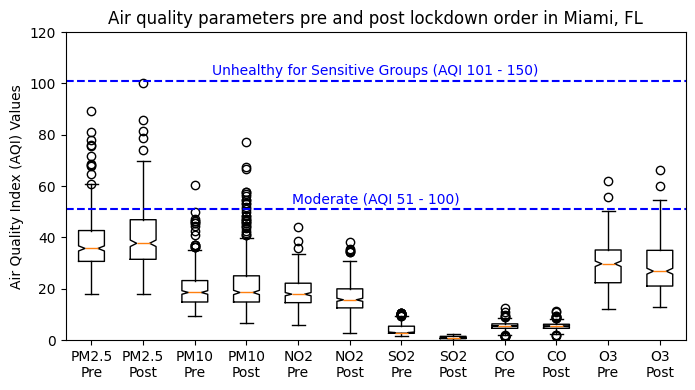

In [28]:
# Create a figure object and Axes object using subplots() method
fig, ax = plt.subplots(figsize=(8,4))

# Plot data 
ax.boxplot(boxplot_data, notch=True)

# Add horizontal line and text "Moderate AQI" at y=51 and at the middle with respect to x
ax.axhline(y=51, color='b', linestyle='--')
ax.text((len(boxplot_data) + 1) / 2, 55, "Moderate (AQI 51 - 100)", 
        ha='center', va='center', color='b')

# Add horizontal line and text "High AQI" at y=101 and at the middle with respect to x
ax.axhline(y=101, color='b', linestyle='--')
ax.text((len(boxplot_data) + 1) / 2, 105, "Unhealthy for Sensitive Groups (AQI 101 - 150)", 
        ha='center', va='center', color='b')

# Set xticklabels with two lines of labels and yticklabels
ax.set_xticks(range(1, len(boxplot_data) + 1))
ax.set_xticklabels(labels)
ax.set_ylabel('Air Quality Index (AQI) Values')

# Set title
ax.set_title('Air quality parameters pre and post lockdown order in Miami, FL')

#x-axis limit
ax.set_ylim(0, 120)

#Show figure
plt.show;